In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold_data_csv = pd.read_csv('gld_price_data.csv')
gold_data = pd.DataFrame(gold_data_csv)

In [4]:
gold_data.head(n = 10) #First 10 rows

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [5]:
gold_data.tail(n = 10) #last 10 rows

,Date,SPX,GLD,USO,SLV,EUR/USD
2280,4/30/2018,2648.050049,124.589996,13.8000,15.3800,1.208123
2281,5/1/2018,2654.800049,123.709999,13.6100,15.2400,1.199156
2282,5/2/2018,2635.669922,123.650002,13.6700,15.4200,1.195100
2283,5/3/2018,2629.729980,124.279999,13.8200,15.4600,1.198926
2284,5/7/2018,2672.629883,124.570000,14.1000,15.5200,1.193374
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data = gold_data.drop("Date", axis="columns") #The date column will not be required for the prediction of Gold price and needs to be dropped

In [7]:
gold_data.head() #Confirming the change in the dataframe

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
gold_data.shape

(2290, 5)

In [9]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [10]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
gold_data.duplicated().value_counts() 

False    2290
dtype: int64

In [12]:
gold_data.isnull().sum() 

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
gold_data.isna().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [14]:
gold_data["GLD"].corr(gold_data["SPX"]) 

0.04934504087062744

In [15]:
gold_data["GLD"].corr(gold_data["USO"])

-0.1863601605032308

In [16]:
gold_data["GLD"].corr(gold_data["SLV"]) #Correlation of Gold price and Silver price

0.8666318812634392

In [17]:
gold_data["GLD"].corr(gold_data["EUR/USD"]) #Correlation of Gold and the exchange rate between the Euro(EUR) & United States Dollar (USD)

-0.024375466130595005

<Axes: >

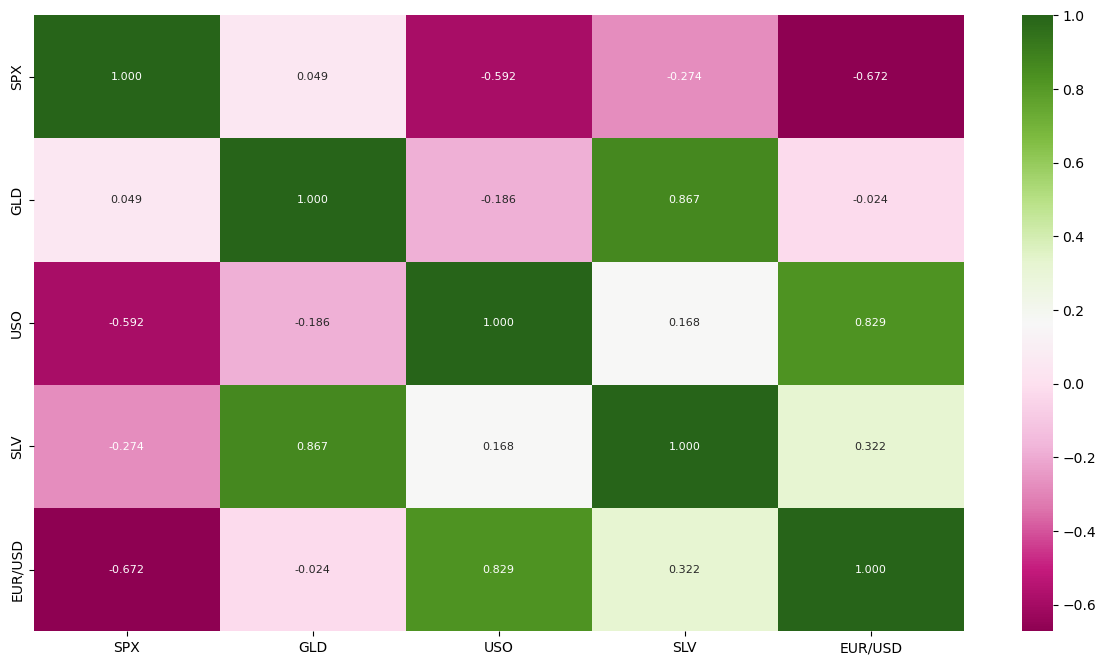

In [18]:
# To visualize the correlations with a heatmap
plt.figure(figsize = (15,8))
sns.heatmap(gold_data.corr(), cbar=True, fmt='.3f',annot=True, annot_kws={'size':8}, cmap="PiYG")

<Axes: xlabel='GLD', ylabel='Count'>

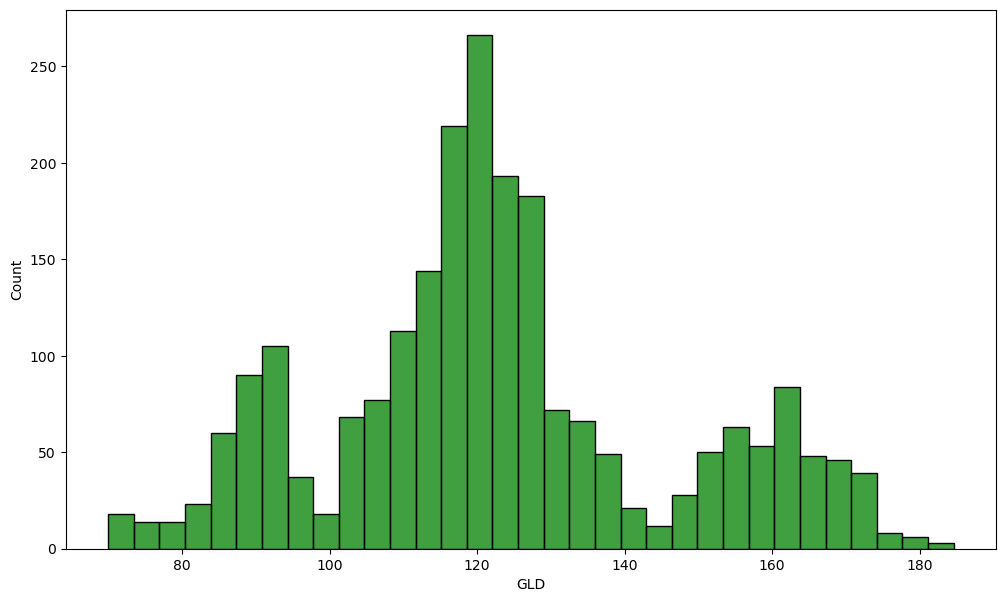

In [19]:
#To visualize the distribution of the Gold prices for better understanding
plt.figure(figsize = (12,7))
sns.histplot(gold_data['GLD'],color='green')

In [20]:
X = gold_data.drop("GLD", axis="columns")
Y = gold_data['GLD']

In [21]:
X #Confirming the features

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [22]:
Y #Confirming the Target

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=1) #Testing the model with 10% of the dataset and training it with 90% of the model

In [24]:
regressor = RandomForestRegressor(n_estimators=100)

In [25]:
regressor.fit(X_train,Y_train) #Model Training

RandomForestRegressor()

In [26]:
test_data_prediction = regressor.predict(X_test) #Making predictions with the test data

In [27]:
print(test_data_prediction)

[113.46130028 149.43400067 142.55209938 112.70780191 113.93010009
  95.56449958 111.67639977  93.5411001  120.63720072 127.25900001
 148.03150002 120.49569874 119.11940072  88.17170033  96.07000043
  92.7456985  116.22850051  89.03209936 125.33030143 114.9311002
 119.28059932 152.81760254 122.5780983  119.78539981 171.36909919
 108.05389864 120.63070111  87.33839941  87.96030047  88.47609913
 121.67269967 154.32110135 149.40919894 126.5740001  126.6912009
  90.93589891 158.94059984 121.42270184 106.7349006  144.1655967
  92.73509957 127.68620071 117.459801   152.60510106 119.44179951
  91.22150147  78.28590048 120.33390159 132.46819996 119.12869972
 127.10090093 165.94229993 153.44470067  92.75009946 148.92180016
 151.7743986  113.68510128 113.16110067  86.92249893 127.63199992
 125.22410146 151.88830251 114.43329988 110.61430009 161.15559764
 117.3149988  108.81960114 131.95069937 133.10190122 125.46740032
 116.89689977 150.02470136 155.67629958 168.84169536 110.18890081
 141.2185979 

In [28]:
metrics.r2_score(Y_test, test_data_prediction)

0.9922083325494842

In [29]:
Y_test #Confirming the test values

1971    110.820000
1163    151.050003
693     137.660004
1651    113.070000
508     114.629997
           ...    
1503    109.879997
123      91.330002
745     147.830002
1328    120.930000
1559    120.760002
Name: GLD, Length: 229, dtype: float64

In [30]:
Y_test = list(Y_test) #Converting the actual values to a list, so that it can be in the same format as the test_data_prediction

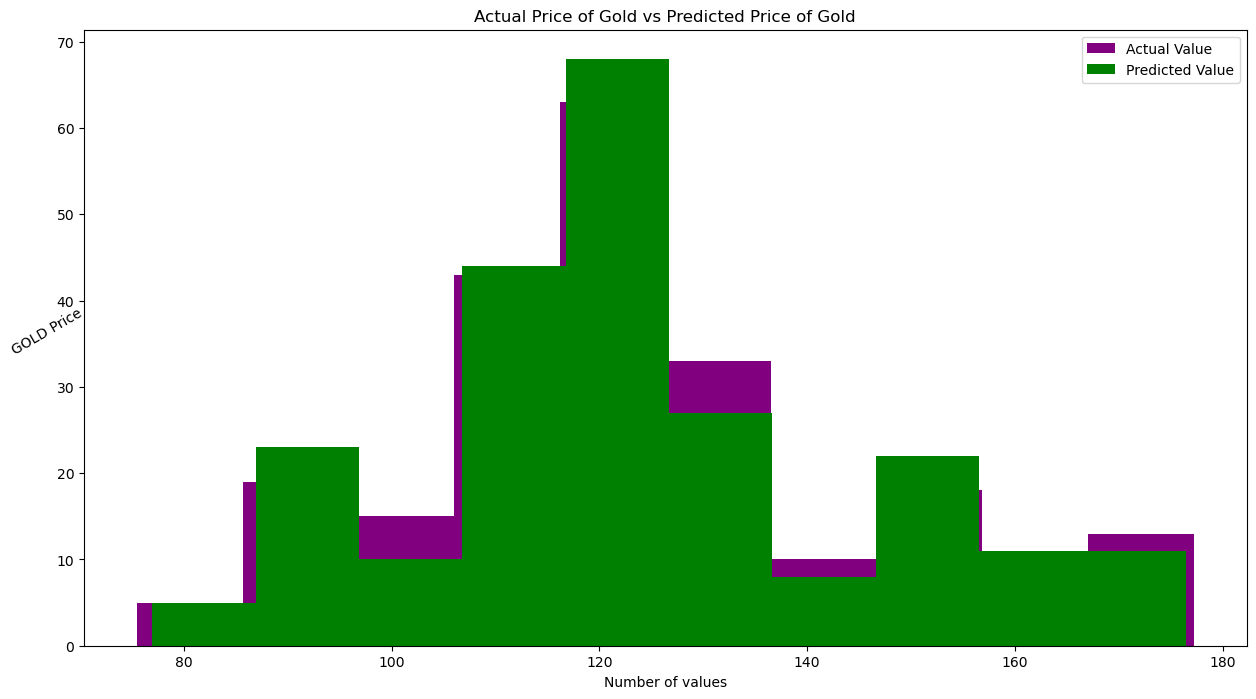

In [31]:
plt.figure(figsize = (15,8))
plt.hist(Y_test, color='purple', label = 'Actual Value')
plt.hist(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price of Gold vs Predicted Price of Gold')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price', rotation=30)
plt.legend()
plt.show()

In [32]:
1 - metrics.r2_score(Y_test, test_data_prediction) #COnfirming the error betwen the actual and predicted prices of Gold

0.007791667450515849